In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

import seaborn as sns
from statistics import NormalDist
print ('Libraries Imported')

Libraries Imported


# Correlation analysis
Between two variables to test their association; include a scatterplot:

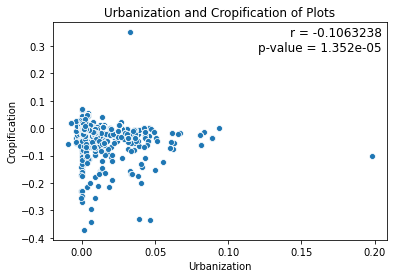

There appears to be a very weak negative correlation (r = -0.106)
between urbanization and cropification in the sampled plots.


In [224]:
df1=pd.read_csv("PlotData.csv", encoding='latin-1')
df1 = df1[["Urbanization", "Cropification"]]
x = df1["Urbanization"]
y = df1["Cropification"]
corr = stats.pearsonr(x,y)

corrtext = "r = " + str(round(corr[0],7)) +"\np-value = " + str(round(corr[1],8))
sns.scatterplot(data=df1, x="Urbanization", y="Cropification")
plt.text(0.205, 0.28, corrtext, horizontalalignment='right', size='large', color='black')
plt.title("Urbanization and Cropification of Plots")
plt.show()
print("There appears to be a very weak negative correlation (r = -0.106)\nbetween urbanization and cropification in the sampled plots.")

# Regression analysis
In which you ask if one variable can predict another; include a scatterplot with line of best fit:

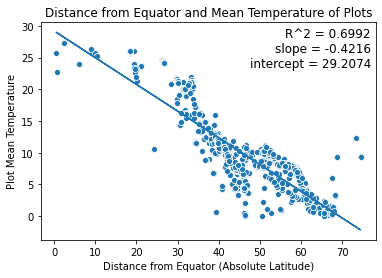

Geographic distance from the equator appears to be a relatively good (R^2 = 0.6992)
predictor of mean temperature on the sampled plots.
In general, plots further away from the equator have lower mean temperatures (slope = -0.4216).


In [227]:
df2=pd.read_csv("PlotData.csv", encoding='latin-1')
df2 = df2[["Latitude", "CRUmnC"]]
for i in df2:
    df2[i] = abs(df2[i])

x = df2["Latitude"]
y = df2["CRUmnC"]
regress = stats.linregress(x,y)

regtext = "R^2 = "+str(round((regress.rvalue)**2, 4))+"\nslope = "+str(round(regress.slope, 4))+"\nintercept = "+str(round(regress.intercept, 4))
sns.scatterplot(data=df2, x="Latitude", y="CRUmnC")
plt.text(77, 23.5, regtext, horizontalalignment='right', size='large', color='black')
plt.plot(x, x*(regress.slope)+regress.intercept, linestyle='solid')
plt.title("Distance from Equator and Mean Temperature of Plots")
plt.xlabel('Distance from Equator (Absolute Latitude)')
plt.ylabel('Plot Mean Temperature')
plt.show()
print("Geographic distance from the equator appears to be a relatively good (R^2 = 0.6992)\npredictor of mean temperature on the sampled plots.")
print("In general, plots further away from the equator have lower mean temperatures (slope = -0.4216).")

# Means comparison
Between two categories within a single variable; include a bar plot with error bars:

Protected mean = 20.282
Protected SD = 11.238
Unprotected mean = 17.742
Unprotected SD = 9.293

t-statistic = 4.911
p-value = 0.0
Protected 95% CI is (19.352468567127946, 21.211361220106095)
Unprotected 95% CI is (17.19305730621764, 18.290638345956275)


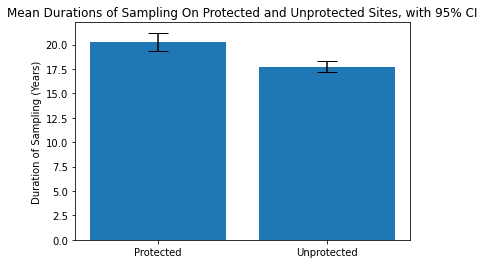

There appears to be a significant difference in mean sampling duration between protected (mean = 20.282)
and unprotected (mean = 17.742) sites. When the means are plotted with 95% CI bars,
the difference is visually apparent and is consistent with the low p-value (<0.001).


In [233]:
df3=pd.read_csv("PlotData.csv", encoding='latin-1')
Protected = df3[df3["ProtectedArea"].str.contains("yes")]
Protected = Protected["Duration"]
Unprotected = df3[df3["ProtectedArea"].str.contains("no")]
Unprotected = Unprotected["Duration"]

Prot_mean = np.mean(Protected)
Prot_sd = np.std(Protected, ddof = 1)
Unprot_mean = np.mean(Unprotected)
Unprot_sd = np.std(Unprotected, ddof = 1)

#compare data to see if we are at least close to assumptions
print('Protected mean = ' + str(round(Prot_mean,3)))
print('Protected SD = ' + str(round(Prot_sd,3)))
print('Unprotected mean = ' + str(round(Unprot_mean,3)))
print('Unprotected SD = ' + str(round(Unprot_sd,3)))
print()

# run t test
twosided = stats.ttest_ind(Protected,Unprotected)
print('t-statistic = ' + str(round(twosided.statistic,3)))
print('p-value = ' + str(round(twosided.pvalue,5)))

# Confidence Interval
Prot_95CI = stats.t.interval(alpha=0.95, df=len(Protected)-1, loc=Prot_mean, scale=stats.sem(Protected)) 
Unprot_95CI = stats.t.interval(alpha=0.95, df=len(Unprotected)-1, loc=Unprot_mean, scale=stats.sem(Unprotected))
print("Protected 95% CI is " +str(Prot_95CI))
print("Unprotected 95% CI is " +str(Unprot_95CI))

# plot bars
plt.bar([1,2],[Prot_mean,Unprot_mean], yerr=[Prot_95CI[1]-Prot_mean, Unprot_95CI[1]-Unprot_mean], capsize =10)
plt.title("Mean Durations of Sampling On Protected and Unprotected Sites, with 95% CI")
plt.xticks([1,2],["Protected","Unprotected"])
plt.ylabel("Duration of Sampling (Years)")
plt.show()
print("There appears to be a significant difference in mean sampling duration between protected (mean = 20.282)")
print("and unprotected (mean = 17.742) sites. When the means are plotted with 95% CI bars,")
print("the difference is visually apparent and is consistent with the low p-value (<0.001).")

# Chi-square analysis
Comparing two categorical variables; include a contingency table and the resulting table of expected values in a decent looking format:

In [67]:
df4=pd.read_csv("InsectAbundanceBiomassData.csv")

Stratum = ["Air", "Herb layer", "Soil surface", "Trees", "Underground", "Water"]
num_Abundance = [0,0,0,0,0,0]
num_Biomass = [0,0,0,0,0,0]

for i in range(len(Stratum)):
    for j in range(len(df4["Stratum"])):
        if df4["Stratum"][j]==Stratum[i] and df4["MetricAB"][j]=="abundance":
            num_Abundance[i] = num_Abundance[i] + 1
        elif df4["Stratum"][j]==Stratum[i] and df4["MetricAB"][j]=="biomass":
            num_Biomass[i] = num_Biomass[i] + 1
array4 = np.column_stack((num_Abundance, num_Biomass))

In [243]:
data4 = pd.DataFrame(array4, index = Stratum, columns = ["Abundance","Biomass"])

chi, p, dof, expected = stats.chi2_contingency(data4)
for i in expected:
    i[0] = round(i[0],2)
    i[1] = round(i[1],2)

print("Observed data:")
display(data4)
print()
print("Expected data:")
display(pd.DataFrame(expected, index = Stratum, columns = ["Abundance","Biomass"]))
print()
print("Chi-square results")
print('   chi-square = '+ str(round(chi,4)))
print('   p value = '+ str(p))
print('   degrees of freedom = '+ str(dof))
print()
print("From the insect data, it appears that the stratum of a site influences which metric of assemblage size")
print("is more often collected at that site. It is very unlikely (p < 0.001) that abundance and biomass metrics")
print("were collected with equal frequency across the different strata sampled.")

Observed data:


,Abundance,Biomass
Air,34451,1716
Herb layer,7867,67
Soil surface,5661,1110
Trees,2400,0
Underground,846,116
Water,9899,4086



Expected data:


,Abundance,Biomass
Air,32405.51,3761.49
Herb layer,7108.84,825.16
Soil surface,6066.79,704.21
Trees,2150.39,249.61
Underground,861.95,100.05
Water,12530.51,1454.49



Chi-square results
   chi-square = 7874.9832
   p value = 0.0
   degrees of freedom = 5

From the insect data, it appears that the stratum of a site influences which metric of assemblage size
is more often collected at that site. It is very unlikely (p < 0.001) that Abundance and Biomass data
are collected with equal frequency across the different strata sampled.
